In [69]:
import numpy as np
from sklearn.datasets import make_spd_matrix


mu_vec1 = np.array([0,0,0])
#cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
cov_mat1 = make_spd_matrix(3)

class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 200).T
print(class1_sample)

[[ 0.3051185   0.86675357 -0.75254211  1.45811483 -1.1938366  -0.1298416
  -0.10018031 -0.06285997 -0.92352084  0.64266497  0.0480249  -0.16582915
   0.18740655 -1.19178926  0.2321921  -0.68071724  0.20003731 -0.39219486
  -0.32378249 -1.31732994  0.46451664 -0.61665732 -0.26917508  0.99052262
   0.01226033  1.56908656  0.53446243  0.22598428  0.3100912   1.57039585
   0.32355655 -0.06889536 -0.64798813  0.20784865  1.00348805 -1.12050228
  -0.28455571 -0.40512922 -0.54316213  0.77078226 -0.09666544  1.12328708
   1.54080932 -0.69570211  0.73929376  0.77186973  0.4701816   1.12809231
  -0.05242619  0.92234476  0.47687554 -1.10518071 -0.0595831   0.07777744
  -1.18802768 -1.3959903  -0.57489122  0.12324983  0.03333069 -0.13436427
   0.722679    0.95083841  0.69095884 -0.0828353   0.34430821 -0.51000996
  -0.9527968  -1.23479204  0.36755308  0.48940732 -0.66943596  1.14742325
   0.08341549 -1.38515856  0.31977816 -1.68381167 -2.04298368  0.62223949
  -0.54581783 -1.48837065 -0.27943375  

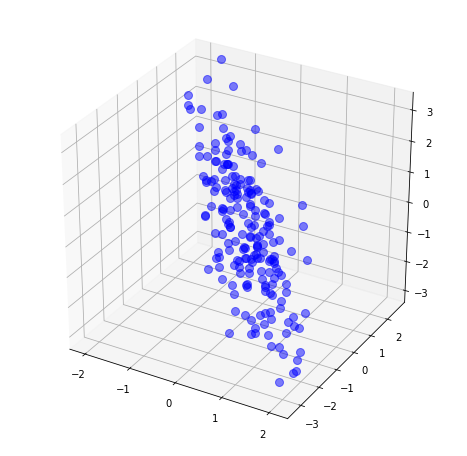

In [70]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')


plt.show()

In [71]:
mean_x = np.mean(class1_sample[0,:])
mean_y = np.mean(class1_sample[1,:])
mean_z = np.mean(class1_sample[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[ 0.10544004]
 [-0.16970396]
 [-0.20738856]]


In [72]:
cov_mat = np.cov([class1_sample[0,:],class1_sample[1,:],class1_sample[2,:]])
print('Covariance Matrix:\n', cov_mat)
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)
print(eig_val_cov)
print(eig_vec_cov)

Covariance Matrix:
 [[ 0.68232039 -0.75459238 -0.94189145]
 [-0.75459238  1.48486752  1.05938469]
 [-0.94189145  1.05938469  1.67055644]]
[ 3.21441438  0.09701208  0.52631789]
[[ 0.42978338 -0.89061844 -0.14861035]
 [-0.60052462 -0.15903531 -0.78363126]
 [-0.67428216 -0.42603586  0.60318903]]


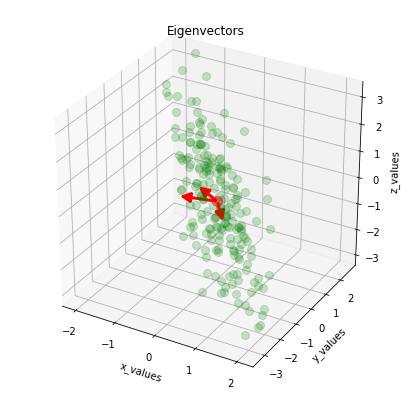

In [73]:
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_cov.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [74]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])
    
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

3.21441438003
0.526317887921
0.09701208426
Matrix W:
 [[ 0.42978338 -0.14861035]
 [-0.60052462 -0.78363126]
 [-0.67428216  0.60318903]]


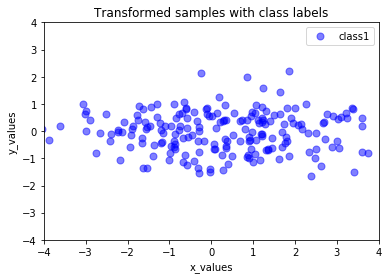

In [77]:
transformed = matrix_w.T.dot(class1_sample)
plt.plot(transformed[0,0:200], transformed[1,0:200], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()